<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%83%9D%ED%99%9C%EC%84%9C%EB%B9%84%EC%8A%A4_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [51]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [52]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [53]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

In [54]:
sh = sh[sh['업종대분류'].str.contains('생활서비스')]

In [55]:
sh

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
62,201903,강원,생활서비스,기계/장비 대여,건설장비 대여,0,0,2,4054000,81,2026860,50046
63,201903,강원,생활서비스,기계/장비 대여,생활장비 대여,0,0,1,198000,3,198000,66000
64,201903,강원,생활서비스,기계/장비 대여,정밀기기 대여,4,10,147,72833000,2015,495464,36145
65,201903,강원,생활서비스,기계/장비 대여,중장비 대여,0,0,1,350000,1,349570,349570
66,201903,강원,생활서비스,농기구,농기구/자재,11,6,238,248173000,3284,1042743,75570
...,...,...,...,...,...,...,...,...,...,...,...,...
23667,202009,충북,생활서비스,화물운송업,종합이삿짐대행,0,0,4,7695000,34,1923850,226335
23668,202009,충북,생활서비스,화물운송업,콜밴,0,1,12,1562000,38,130167,41105
23669,202009,충북,생활서비스,화물운송업,퀵배달,0,0,3,294000,6,98000,49000
23670,202009,충북,생활서비스,화물운송업,택배업,0,0,86,188515000,5400,2192030,34910


In [56]:
group = sh.groupby(by='업종중분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종중분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,기계/장비 대여,520,175,11343,16863016000,230749,437194832,43745069
1,농기구,242,108,18421,20323142000,326588,234559247,15047830
2,대중교통,26,28,1191,601225972000,97603221,47261432350,21279044
3,미용/사우나/마사지,8380,5012,463956,350553644000,8879877,784082646,62054977
4,사진,466,311,25533,22992477000,419454,145078127,10932855
5,사회단체,388,201,21917,77784817000,1162810,734799286,29067088
6,세탁소,1043,646,62771,34924179000,1996874,61838810,5683113
7,수리점,1634,396,27630,62533481000,1011922,1686410498,22284105
8,여객선,8,1,260,4858047000,123243,1249634577,2485525
9,연료,700,628,75327,3038511457000,49111405,8813018348,29033626


In [57]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [58]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [59]:
vcols = ['매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']

In [60]:
# 표준화 수행
cls = group[vcols]
cols = cls.columns
scaler = RobustScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[-1.96156138e-01, -2.10205085e-01, -1.02406721e-01,
        -8.23171351e-03,  7.40850163e-01],
       [ 0.00000000e+00, -1.97318214e-01, -9.68496072e-02,
        -9.76191918e-03,  5.01609489e-01],
       [-4.77503568e-01,  1.96619242e+00,  5.54362376e+00,
         2.00066985e+00, -7.34588588e-01],
       [ 1.23473333e+01,  1.03259007e+00,  3.99102990e-01,
        -1.11496277e-02,  0.00000000e+00],
       [ 1.97098397e-01, -1.87376561e-01, -9.14648793e-02,
        -1.05711897e-02,  3.38169151e-01],
       [ 9.68863885e-02,  1.66916658e-02, -4.83622390e-02,
         0.00000000e+00,  6.04462475e-01],
       [ 1.22909363e+00, -1.42938209e-01,  0.00000000e+00,
        -1.19446972e-02, -4.84787018e-01],
       [ 2.55213602e-01, -4.01103086e-02, -5.71113056e-02,
        -5.13207575e-03,  4.92084840e-01],
       [-5.03304835e-01, -2.54916311e-01, -1.08640332e-01,
         6.04111377e-02, -1.30082018e-03],
       [ 1.57706431e+00,  1.10436023e+01,  2.73188174e+00,
         1.46833868e-01

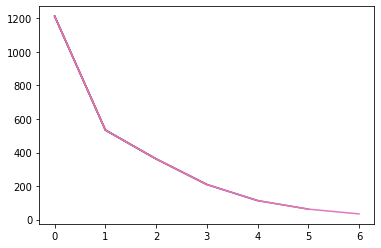

In [61]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [62]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=2)
km.fit(scaled)
km.cluster_centers_

array([[ 1.07685261,  0.93264361,  0.73046914,  1.16573573,  0.34833074],
       [-0.44133745, 25.57955349,  2.25781079, 11.08568286,  2.86824235]])

In [63]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,1.076853,0.932644,0.730469,1.165736,0.348331
1,-0.441337,25.579553,2.257811,11.085683,2.868242


In [64]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [65]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.196156,-0.210205,-0.102407,-0.008232,0.740850
1,0.000000,-0.197318,-0.096850,-0.009762,0.501609
2,-0.477504,1.966192,5.543624,2.000670,-0.734589
3,12.347333,1.032590,0.399103,-0.011150,0.000000
4,0.197098,-0.187377,-0.091465,-0.010571,0.338169
5,0.096886,0.016692,-0.048362,0.000000,0.604462
6,1.229094,-0.142938,0.000000,-0.011945,-0.484787
7,0.255214,-0.040110,-0.057111,-0.005132,0.492085
8,-0.503305,-0.254916,-0.108640,0.060411,-0.001301
9,1.577064,11.043602,2.731882,0.146834,0.493694


In [66]:
names = pd.DataFrame(group['업종중분류'])
names.reset_index(inplace=True, drop=True)
names

,업종중분류
0,기계/장비 대여
1,농기구
2,대중교통
3,미용/사우나/마사지
4,사진
5,사회단체
6,세탁소
7,수리점
8,여객선
9,연료


In [67]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종중분류,클러스터
0,-0.196156,-0.210205,-0.102407,-0.008232,0.740850,기계/장비 대여,0
1,0.000000,-0.197318,-0.096850,-0.009762,0.501609,농기구,0
2,-0.477504,1.966192,5.543624,2.000670,-0.734589,대중교통,0
3,12.347333,1.032590,0.399103,-0.011150,0.000000,미용/사우나/마사지,0
4,0.197098,-0.187377,-0.091465,-0.010571,0.338169,사진,0
5,0.096886,0.016692,-0.048362,0.000000,0.604462,사회단체,0
6,1.229094,-0.142938,0.000000,-0.011945,-0.484787,세탁소,0
7,0.255214,-0.040110,-0.057111,-0.005132,0.492085,수리점,0
8,-0.503305,-0.254916,-0.108640,0.060411,-0.001301,여객선,0
9,1.577064,11.043602,2.731882,0.146834,0.493694,연료,0


In [68]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,1.076853,0.932644,0.730469,1.165736,0.348331
1,-0.441337,25.579553,2.257811,11.085683,2.868242


In [73]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종중분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='Cluster0',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='Cluster1',
      line_color=color[1]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[2],
  #     theta = categories,
  #     fill='toself',
  #     name='Cluster2',
  #     line_color=color[2]
  # ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
# show_cluster(result, '편의점')

In [74]:
# StandardScaler, MinMaxScaler 사용 시 Outlier에 굉장히 민감함.
for col in sh['업종중분류'].unique():
  show_cluster(result, col)

0    0
Name: 클러스터, dtype: int32


1    0
Name: 클러스터, dtype: int32


2    0
Name: 클러스터, dtype: int32


3    0
Name: 클러스터, dtype: int32


4    0
Name: 클러스터, dtype: int32


5    0
Name: 클러스터, dtype: int32


6    0
Name: 클러스터, dtype: int32


7    0
Name: 클러스터, dtype: int32


8    0
Name: 클러스터, dtype: int32


9    0
Name: 클러스터, dtype: int32


10    0
Name: 클러스터, dtype: int32


11    1
Name: 클러스터, dtype: int32


12    0
Name: 클러스터, dtype: int32


13    0
Name: 클러스터, dtype: int32


14    0
Name: 클러스터, dtype: int32


15    0
Name: 클러스터, dtype: int32


17    0
Name: 클러스터, dtype: int32


18    0
Name: 클러스터, dtype: int32


16    0
Name: 클러스터, dtype: int32
